## Importar las librerias 

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

##  Cargamos el conjunto de datos

In [2]:
data_path = 'Dataset.csv'
real_estate_data = pd.read_csv(data_path)

In [3]:
# Visualizamos las primeras filas para comprender qué datos contiene y cómo están estructurados.

print(real_estate_data.head())

   No  X1 transaction date  X2 house age  \
0   1             2012.917          32.0   
1   2             2012.917          19.5   
2   3             2013.583          13.3   
3   4             2013.500          13.3   
4   5             2012.833           5.0   

   X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                84.87882                               10   
1                               306.59470                                9   
2                               561.98450                                5   
3                               561.98450                                5   
4                               390.56840                                5   

   X5 latitude  X6 longitude  Y house price of unit area  
0     24.98298     121.54024                        37.9  
1     24.98034     121.53951                        42.2  
2     24.98746     121.54391                        47.3  
3     24.98746     121.54391  

# Preparamos los datos

In [4]:
# Preparamos los datos para el análisis de regresión lineal múltiple.
X = real_estate_data.drop(['No', 'Y house price of unit area'], axis=1)
y = real_estate_data['Y house price of unit area']

In [5]:
# Dividimos el conjunto de datos en entrenamiento y prueba.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Creacion y entrenamiento 

In [6]:
# Creamos y entrenamos el modelo de regresión lineal múltiple.
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [7]:
# Realizamos predicciones utilizando el conjunto de prueba.
y_pred = linear_model.predict(X_test)

# # Evaluacion del modelo

In [8]:
# Evaluamos el modelo con las métricas MSE y R^2.
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R^2): {r2}")

Error cuadrático medio (MSE): 53.50561912450816
Coeficiente de determinación (R^2): 0.6810580555095583


In [9]:
# Visualizamos los coeficientes del modelo.
coefficients = pd.DataFrame(linear_model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

                                        Coefficient
X1 transaction date                        5.440742
X2 house age                              -0.270791
X3 distance to the nearest MRT station    -0.004759
X4 number of convenience stores            1.091425
X5 latitude                              229.043054
X6 longitude                             -29.492591


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


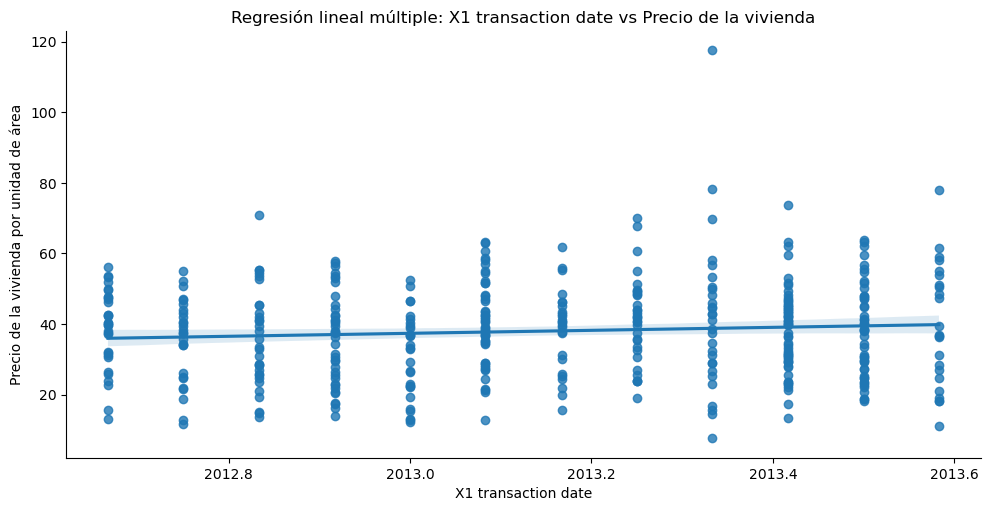

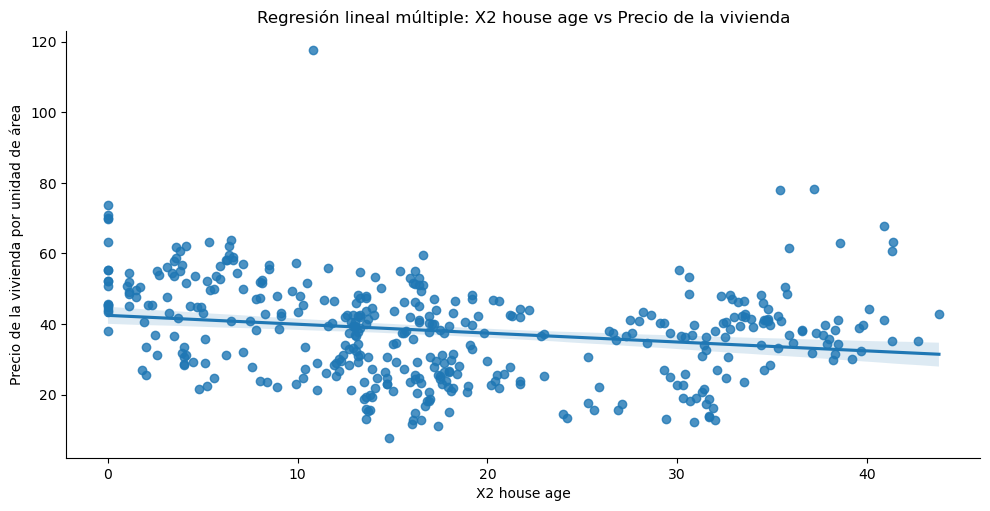

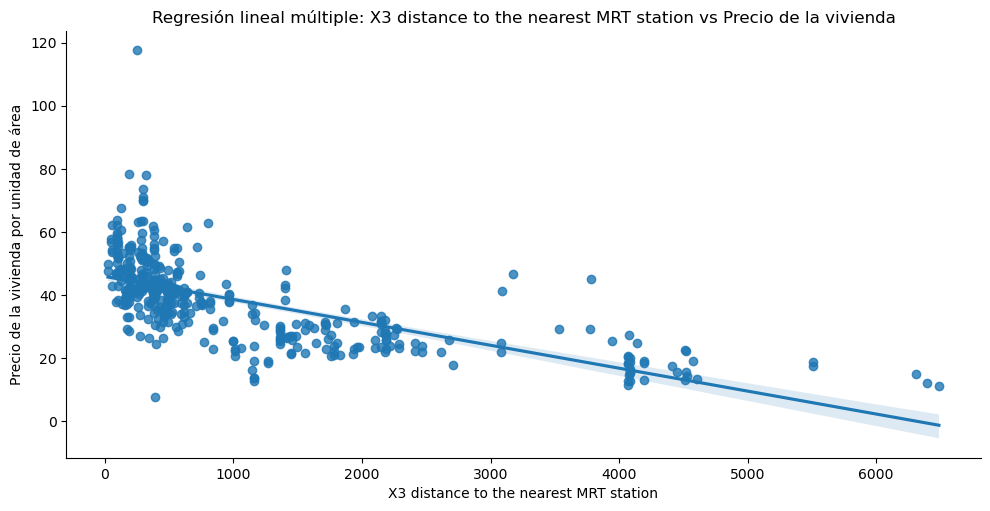

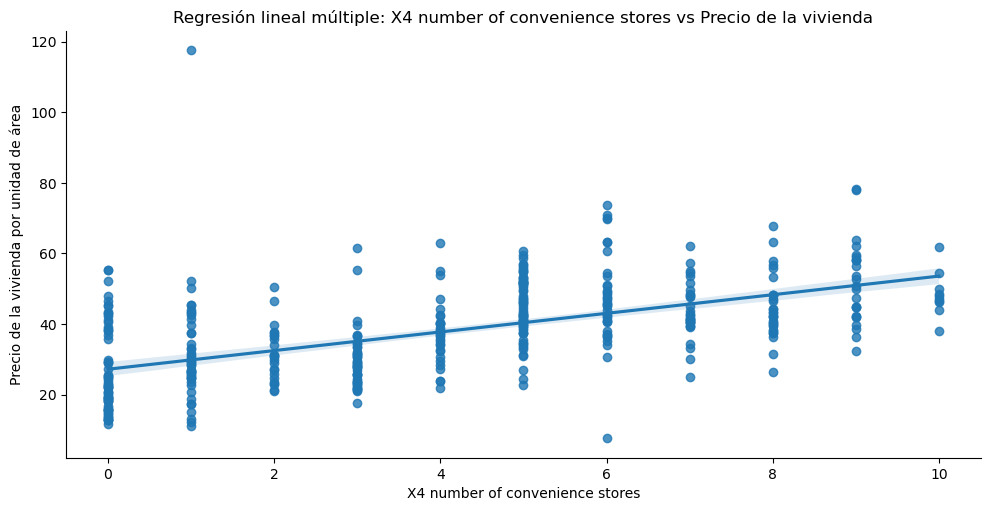

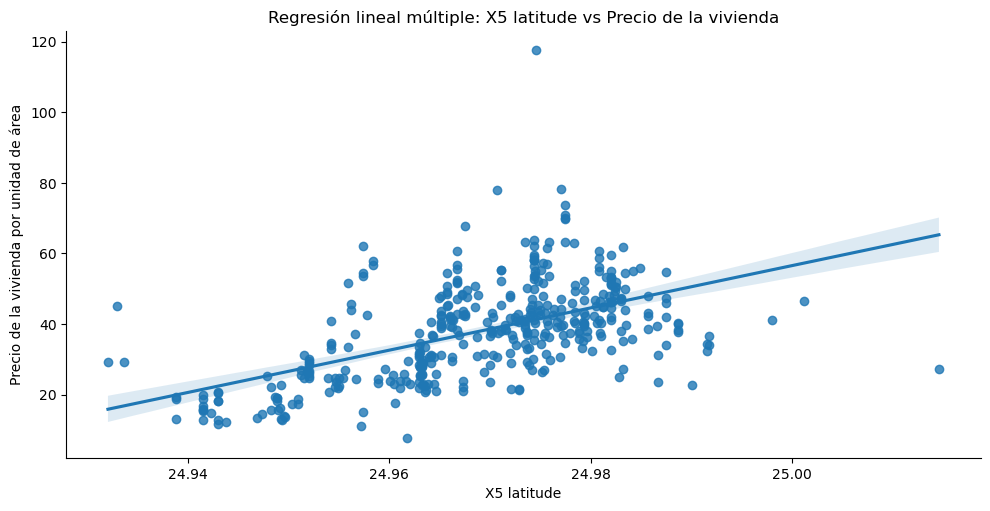

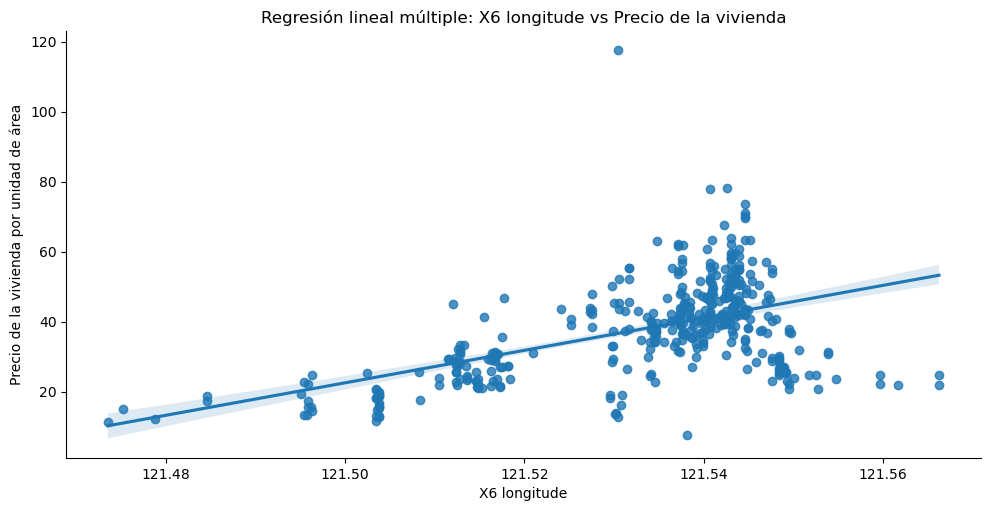

In [12]:
for feature in X_train.columns:
    sns.lmplot(x=feature, y='Y house price of unit area', data=real_estate_data, aspect=2, height=5)
    plt.title(f'Regresión lineal múltiple: {feature} vs Precio de la vivienda')
    plt.xlabel(feature)
    plt.ylabel('Precio de la vivienda por unidad de área')

plt.show()

# Aplicacion de técnica de eliminación hacia atrás 

In [22]:
import statsmodels.api as sm

def backward_elimination(x, y, significance_level = 0.05):
    num_vars = len(x.columns)
    for i in range(0, num_vars):
        regressor_OLS = sm.OLS(y, x).fit()
        max_p_value = max(regressor_OLS.pvalues)
        feature_with_max_p = regressor_OLS.pvalues.idxmax()

        if max_p_value > significance_level:
            x = x.drop(feature_with_max_p, axis=1)
            print(f"Eliminando '{feature_with_max_p}' con p-valor {max_p_value}")

            # Volver a ajustar el modelo y verificar si el R-cuadrado ajustado ha mejorado
            regressor_OLS = sm.OLS(y, x).fit()
            print(f"Nuevo modelo R-cuadrado ajustado: {regressor_OLS.rsquared_adj}")
        else:
            print("No se eliminaron más variables.")
            print("Variables finales seleccionadas:", x.columns.tolist())
            break

    return x

# Aplicar la función de eliminación hacia atrás
X_Modeled = backward_elimination(X_train, y_train)

No se eliminaron más variables.
Variables finales seleccionadas: ['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']


la función backward_elimination no solo considera los p-valores, sino también cómo la eliminación de cada variable afecta el ajuste ajustado R-cuadrado del modelo.

In [16]:
# Reentrenamiento del modelo con las variables seleccionadas
# Creamos y entrenamos el modelo
model = LinearRegression()
model.fit(X_Modeled, y_train)

LinearRegression()

In [17]:
# Realizamos predicciones usando el conjunto de prueba (ajustando también las variables del conjunto de prueba)
X_test_modeled = X_test[X_Modeled.columns]
y_pred = model.predict(X_test_modeled)

In [18]:
# Evaluamos el nuevo modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Modelo con eliminación hacia atrás - Error cuadrático medio (MSE): {mse}")
print(f"Modelo con eliminación hacia atrás - Coeficiente de determinación (R^2): {r2}")

Modelo con eliminación hacia atrás - Error cuadrático medio (MSE): 53.50561912450816
Modelo con eliminación hacia atrás - Coeficiente de determinación (R^2): 0.6810580555095583


In [19]:
# Opcionalmente, también puedes mostrar los coeficientes del modelo
coefficients = pd.DataFrame(model.coef_, X_Modeled.columns, columns=['Coefficient'])
print(coefficients)

                                        Coefficient
X1 transaction date                        5.440742
X2 house age                              -0.270791
X3 distance to the nearest MRT station    -0.004759
X4 number of convenience stores            1.091425
X5 latitude                              229.043054
X6 longitude                             -29.492591


La eliminación hacia atrás realiza un proceso iterativo para identificar y eliminar las variables menos significativas de un modelo de regresión lineal múltiple. El objetivo de este proceso es simplificar el modelo manteniendo solo aquellas variables que tienen un impacto estadísticamente significativo en la variable dependiente. 

Parece que todas las variables en el modelo original tienen p-valores por debajo del umbral de significancia y/o su eliminación no mejora el R-cuadrado ajustado del modelo. Esto significa que todas las variables son consideradas estadísticamente significativas y contribuyen de manera importante al modelo, razón por la cual el proceso de eliminación hacia atrás no descartó ninguna variable.

Esto es un indicativo de que todas las variables en tu conjunto de datos tienen un impacto significativo en la variable dependiente (en este caso, el precio de la vivienda por unidad de área) y, por lo tanto, son relevantes para el modelo de regresión.